In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lstm import LSTM, LSTMCell

In [2]:
weather_train = pd.read_csv('./data/DailyDelhiClimateTrain.csv')
weather_test = pd.read_csv('./data/DailyDelhiClimateTest.csv')
print(weather_train.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


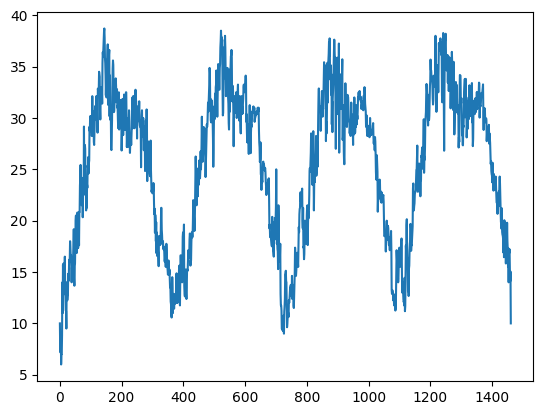

In [3]:
#quick look at mean temperature ovee time
m_temp = weather_train['meantemp'].values
plt.plot(m_temp)

In [4]:
print(m_temp[:10])

[10.          7.4         7.16666667  8.66666667  6.          7.
  7.          8.85714286 14.         11.        ]


In [5]:
#perform train test split
def expanding_window_cv(data, min_train_size):
    for i in range(len(data) - min_train_size):
        train_data = data[:min_train_size + i]
        test_data = data[min_train_size + i:min_train_size + i + 1]
        yield train_data, test_data

In [6]:
def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

In [7]:
class SGD:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
    
    def update(self, parameters, gradients):
        for param, grad in zip(parameters, gradients):
            param -= self.learning_rate * grad

In [8]:
# LSTM Training
input_size = 1  # Input size is 1 for temperature data
hidden_size = 2
learning_rate = 0.01
num_epochs = 2
num_layers = 5
batch_size = 1  # Batch size is 1 for expanding window CV
min_train_size = 10 

In [9]:
lstm_cell = LSTM(input_size, hidden_size, num_layers)
optimizer = SGD(learning_rate)

In [10]:
#try training once
# Define your LSTM model and other necessary components

# Training loop (executed just once)
epoch_loss_test = 0.0

for train_data, test_data in expanding_window_cv(m_temp, min_train_size):
    # Initialize hidden state and cell state
    prev_hidden_state = np.zeros((hidden_size, 1))
    prev_cell_state = np.zeros((hidden_size, 1))

    # Training
    for i in range(len(train_data) - 1):
        x = np.array([[train_data[i]]])
        y_true = np.array([[train_data[i + 1]]])

        # Within the training loop
        print("Before calling forward method")
        hidden_state, cell_state = lstm_cell.forward(x, prev_hidden_state, prev_cell_state)
        print("After calling forward method")


        # Compute loss
        loss = mse_loss(hidden_state, y_true)
        epoch_loss_test += loss

        # Update states
        prev_hidden_state = hidden_state
        prev_cell_state = cell_state

    # Calculate average loss for the training data
    epoch_loss_test /= len(train_data) - min_train_size

    print(f"Training Loss: {epoch_loss_test:.4f}")


Before calling forward method
Shape of prev_hidden_state: (1,)
Shape of x: (1, 1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    for train_data, test_data in expanding_window_cv(m_temp, min_train_size):
        # Initialize hidden state and cell state
        prev_hidden_state = np.zeros((hidden_size, 1))
        prev_cell_state = np.zeros((hidden_size, 1))
        
        # Training
        for i in range(len(train_data) - 1):
            x = np.array([[train_data[i]]])
            y_true = np.array([[train_data[i + 1]]])
            
            # Forward pass
            hidden_state, cell_state = lstm_cell.forward(x, prev_hidden_state, prev_cell_state)
            
            # Compute loss
            loss = mse_loss(hidden_state, y_true)
            epoch_loss += loss
            
            # Update states
            prev_hidden_state = hidden_state
            prev_cell_state = cell_state
        
        # Update parameters
        # (not implemented here)
    
    # Calculate average loss for the epoch
    epoch_loss /= len(m_temp) - min_train_size
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

ValueError: shapes (4,5) and (2,1) not aligned: 5 (dim 1) != 2 (dim 0)